1. Classification on the Wine Dataset
Assignment Task:
* Use the Wine dataset for a multi-class classification problem.
* Implement a Random Forest Classifier to predict the wine category based on various chemical properties.
* Evaluate the model's performance using cross-validation and provide a detailed report on the classification accuracy, precision, recall, and F1-score.
Additional Challenges:
* Compare the performance of Random Forest with other classifiers (e.g., Logistic Regression, SVM).
* Visualize feature importance and discuss which features have the most impact on the classification.

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/WineQT.csv')

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

# Telco Customer Churn dataset

In [19]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/Telco-Customer-Churn.csv')

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [25]:
df = df.drop('customerID', axis=1)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7027     No
7028    Yes
7029     No
7030     No
7031     No
Name: OnlineBackup, Length: 7032, dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from skle

In [43]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=101)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [45]:
preds = model.predict(X_test)
preds.shape

(2110,)

In [37]:
y_test.shape

(2110,)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [47]:
confusion_matrix(y_test,preds)

array([[1418,  162],
       [ 264,  266]], dtype=int64)

In [48]:
cm = confusion_matrix(y_test, preds)

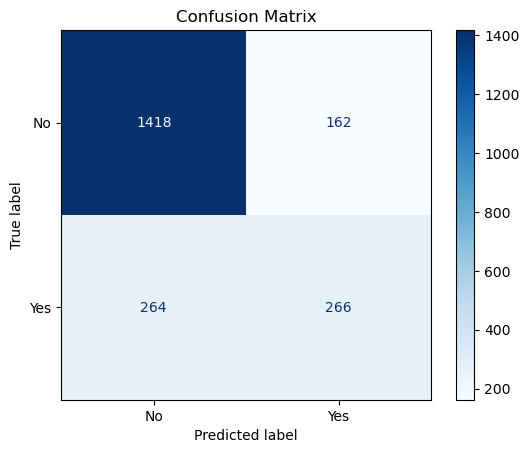

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.50      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

